<a href="https://colab.research.google.com/github/raputra18/Solar-Power-MachineLearning/blob/main/data/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [ ]:
df = pd.read_csv('data_putra.csv',sep=';')



Index(['waktu', 'hari', 'mode', 'LDR_L1', 'LDR_L2', 'LDR_L3', 'LDR_R1',
       'LDR_R2', 'LDR_R3', 'LDR_U1', 'LDR_U2', 'LDR_U3', 'LDR_U4', 'arus',
       'tegangan', 'daya'],
      dtype='object')
Contoh Data:


,waktu,hari,mode,LDR_L1,LDR_L2,LDR_L3,LDR_R1,LDR_R2,LDR_R3,LDR_U1,LDR_U2,LDR_U3,LDR_U4,arus,tegangan,daya
0,09:00,1,tracking,3664,3225,4035,2975,3479,2842,3859,3647,4095,3622,1.21,11.93,14.40
1,09:02,1,tracking,3982,3216,3984,3510,3829,2833,3798,3621,4095,3615,1.12,11.85,13.27
2,09:04,1,tracking,3514,2960,3646,3095,3515,2653,3279,3527,3763,3570,0.64,11.77,7.58
3,09:06,1,tracking,3583,3030,3699,3203,3578,2698,3376,3583,3841,3651,0.68,11.77,8.00
4,09:08,1,tracking,4019,3306,4033,3645,3929,2908,3884,3680,4095,3734,1.16,11.89,13.84


Akurasi model (R²): 0.995
Mean Absolute Error: 0.091
Root Mean Square Error: 0.212


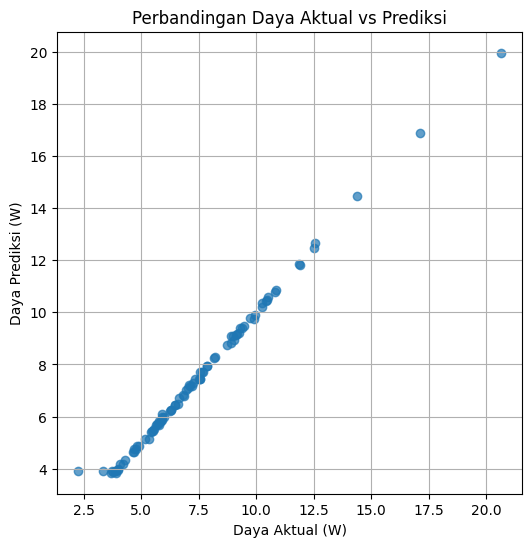

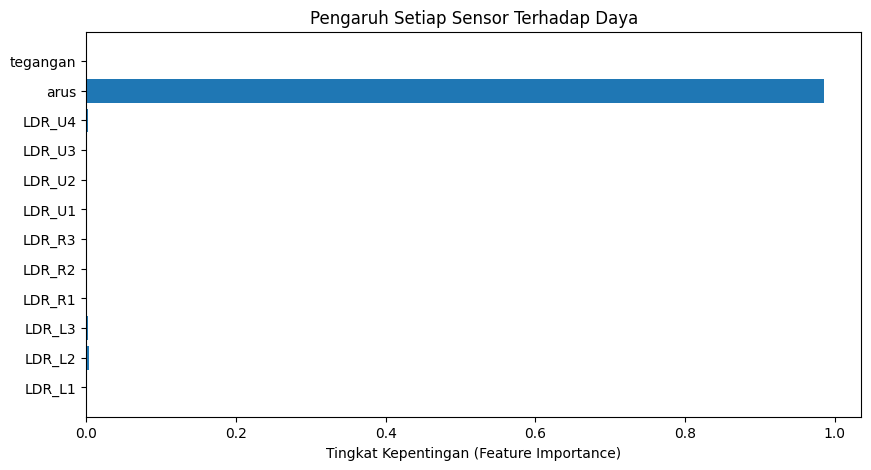

In [ ]:
df = df.replace(',', '.', regex=True)
print(df.columns)

df[['arus','tegangan','daya']] = df[['arus','tegangan','daya']].astype(float)
# Cek 5 data teratas
print("Contoh Data:")
display(df.head())

# === STEP 3: Pisahkan fitur dan target ===
fitur = ['LDR_L1','LDR_L2','LDR_L3','LDR_R1','LDR_R2','LDR_R3','LDR_U1','LDR_U2','LDR_U3','LDR_U4','arus','tegangan']
X = df[fitur]
y = df['daya']

# === STEP 4: Split data (80% train, 20% test) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === STEP 5: Buat dan latih model ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === STEP 6: Evaluasi ===
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Akurasi model (R²): {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Square Error: {rmse:.3f}")

# === STEP 7: Visualisasi hasil prediksi vs aktual ===
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Daya Aktual (W)")
plt.ylabel("Daya Prediksi (W)")
plt.title("Perbandingan Daya Aktual vs Prediksi")
plt.grid(True)
plt.show()

# === STEP 8: Lihat fitur paling berpengaruh ===
importance = model.feature_importances_
plt.figure(figsize=(10,5))
plt.barh(fitur, importance)
plt.xlabel("Tingkat Kepentingan (Feature Importance)")
plt.title("Pengaruh Setiap Sensor Terhadap Daya")
plt.show()

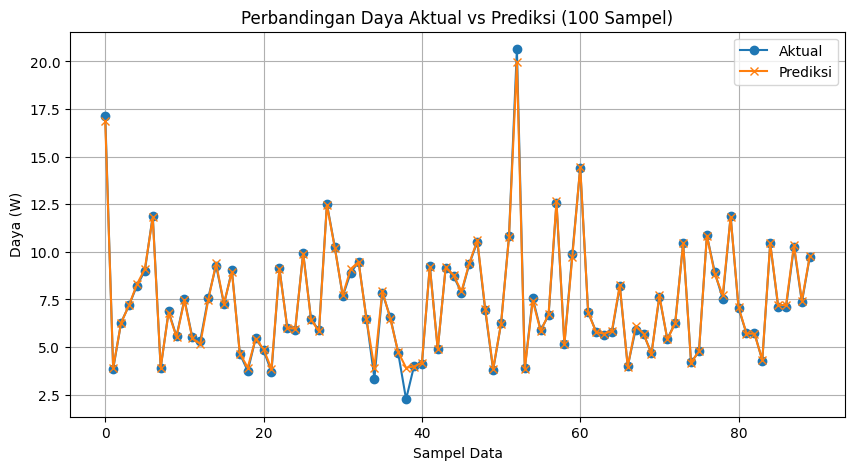

Kesimpulan:
Model ML ini mampu memprediksi daya dengan akurasi sangat tinggi (R²=0.995).
Sensor yang paling berpengaruh adalah bagian atas dan tegangan panel.
Model ini berpotensi digunakan untuk prediksi performa energi pada sistem konsentrator panel surya secara real-time.


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Aktual', marker='o')
plt.plot(y_pred[:100], label='Prediksi', marker='x')
plt.title('Perbandingan Daya Aktual vs Prediksi (100 Sampel)')
plt.xlabel('Sampel Data')
plt.ylabel('Daya (W)')
plt.legend()
plt.grid(True)
plt.show()


print("Kesimpulan:")
print("Model ML ini mampu memprediksi daya dengan akurasi sangat tinggi (R²=0.995).")
print("Sensor yang paling berpengaruh adalah bagian atas dan tegangan panel.")
print("Model ini berpotensi digunakan untuk prediksi performa energi pada sistem konsentrator panel surya secara real-time.")